In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pwd

'/home/charmi/Documents/Small_Projects/Titanic_kaggle'

In [6]:
df = pd.read_csv('/home/charmi/Documents/Small_Projects/Titanic_kaggle/train.csv')

In [4]:
print("The dimension of data table", df.shape)

The dimension of data table (891, 12)


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Saundercock, Mr. William Henry",male,347082,G6,S
freq,1,577,7,4,644


In [10]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Saundercock, Mr. William Henry",male,347082,G6,S
freq,1,577,7,4,644


In [11]:
df.describe(exclude=[np.number])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Saundercock, Mr. William Henry",male,347082,G6,S
freq,1,577,7,4,644


In [12]:
#Number of coulmns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df.columns.value_counts()

Embarked       1
Age            1
SibSp          1
Name           1
Parch          1
Cabin          1
PassengerId    1
Sex            1
Survived       1
Pclass         1
Ticket         1
Fare           1
dtype: int64

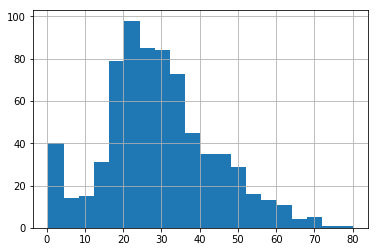

In [14]:
#Histogram of numerical data(Age)
df['Age'].hist(bins=20)

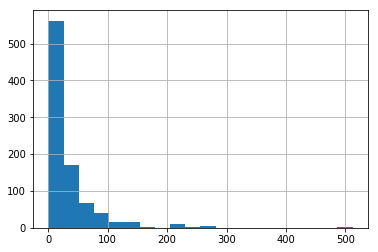

In [15]:
df['Fare'].hist(bins=20)

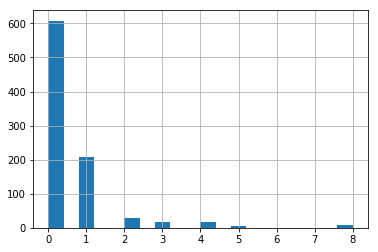

In [16]:
df['SibSp'].hist(bins=20)

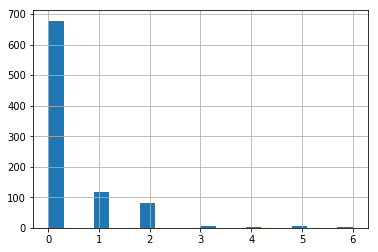

In [17]:
df['Parch'].hist(bins=20)

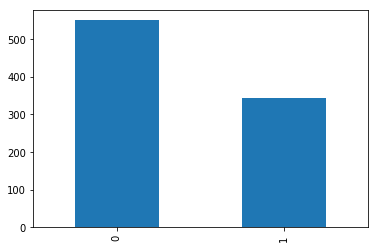

In [18]:
#Bar plot of Categorical data
temp1 = df['Survived'].value_counts()
temp1.plot(kind='bar')

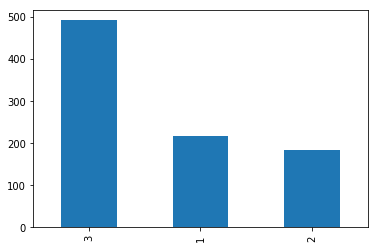

In [19]:
temp2 = df['Pclass'].value_counts()
temp2.plot(kind='bar')

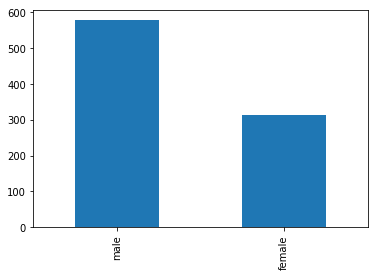

In [20]:
temp3 = df['Sex'].value_counts()
temp3.plot(kind='bar')

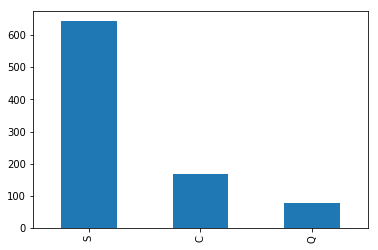

In [21]:
temp4 = df['Embarked'].value_counts()
temp4.plot(kind='bar')

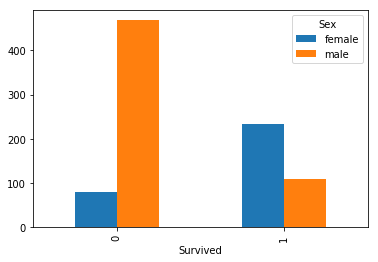

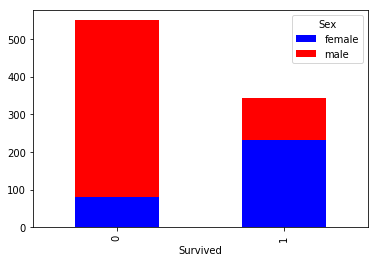

In [22]:
#Crosstab plot of data
temp5 = pd.crosstab(df['Survived'], df['Sex'])
temp5.plot(kind='bar')
temp5.plot(kind='bar', stacked=True, color=['blue','red'], grid=False)

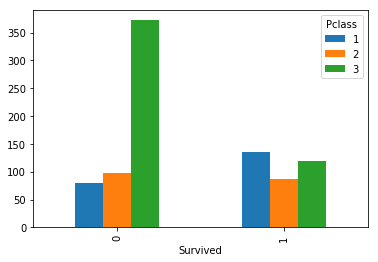

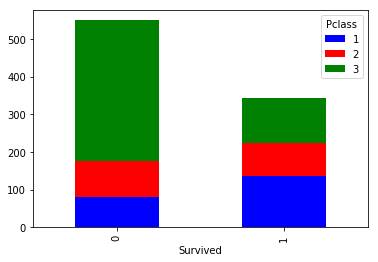

In [23]:
temp5 = pd.crosstab(df['Survived'], df['Pclass'])
temp5.plot(kind='bar')
temp5.plot(kind='bar', stacked=True, color=['blue','red', 'green'], grid=False)

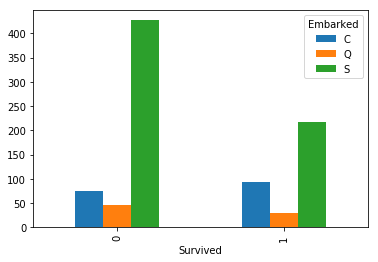

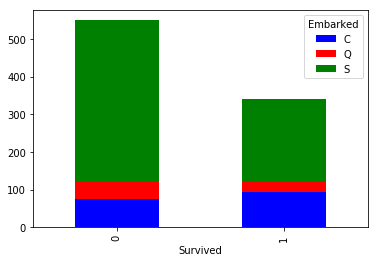

In [24]:
temp5 = pd.crosstab(df['Survived'], df['Embarked'])
temp5.plot(kind='bar')
temp5.plot(kind='bar', stacked=True, color=['blue','red', 'green'], grid=False)

/home/charmi/miniconda3/envs/av/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


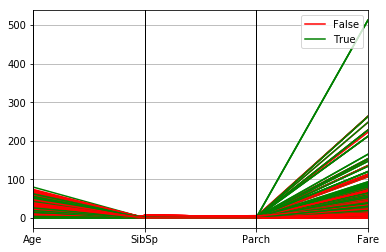

In [25]:
#Parallel plotting visualization of numerical data with y 

from pandas.plotting import parallel_coordinates

cols = ['Age', 'SibSp', 'Parch', 'Fare', 'Survived']
selected_columns = df[cols]
selected_columns['is_survived'] = selected_columns['Survived'] == 1
selected_columns = selected_columns.drop(columns = 'Survived')

parallel_coordinates(selected_columns, 'is_survived', color = ['red', 'green'])

In [26]:
#After Normalization
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe
data_norm = df.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))


/home/charmi/miniconda3/envs/av/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


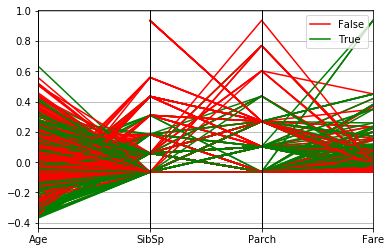

In [27]:
cols = ['Age', 'SibSp', 'Parch', 'Fare', 'Survived']
selected_columns = data_norm[cols]
selected_columns['is_survived'] = selected_columns['Survived'] == 1
selected_columns = selected_columns.drop(columns = 'Survived')

parallel_coordinates(selected_columns, 'is_survived', color = ['red', 'green'])

In [28]:
#Null values in data
df.apply(lambda x : sum(x.isnull()), axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
null_data = df[df['Embarked'].isnull()]
print(null_data)

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [30]:
#Null values of age replaced by mean of Age
df['Age'].fillna(df['Age'].mean, inplace=True)

#Null value of Embarked replaced by mode of Embarked
df['Embarked'].fillna('S', inplace=True)

In [31]:
df.apply(lambda x : sum(x.isnull()), axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [35]:
def log_transformation(df):
    return df.apply(np.log1p);

df['Fare_log'] = log_transformation(df['Fare'])

In [36]:
df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Fare_log
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200,6.240917


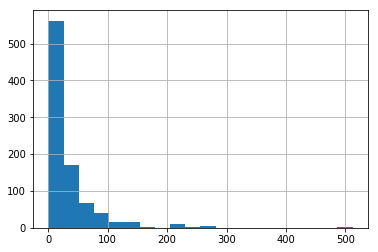

In [44]:
df['Fare'].hist(bins=20)

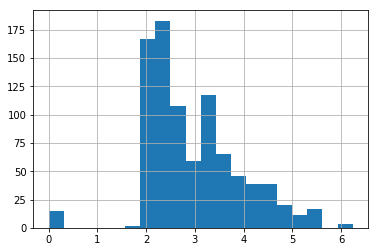

In [45]:
df['Fare_log'].hist(bins=20)

In [46]:
#Dropping columns which we do not use
#Dropping fare as will use fare_log
df.drop(["PassengerId", "Name", "Ticket", "Cabin", "Fare" ], axis = 1, inplace = True) 

In [47]:
df.describe()

,Survived,Pclass,SibSp,Parch,Fare_log
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,2.962246
std,0.486592,0.836071,1.102743,0.806057,0.969048
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,2.187218
50%,0.000000,3.000000,0.000000,0.000000,2.737881
75%,1.000000,3.000000,1.000000,0.000000,3.465736
max,1.000000,3.000000,8.000000,6.000000,6.240917


In [48]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'Fare_log'],
      dtype='object')

In [49]:
# get the categorical data
cat_features = ['Pclass','Sex', 'Embarked']

data_cat = df[cat_features].replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})

print(data_cat.head(5))

data_cat_encode = pd.get_dummies(data_cat)

data_cat_encode.head(4)


  Pclass     Sex Embarked
0    3rd    male        S
1    1st  female        C
2    3rd  female        S
3    1st  female        S
4    3rd    male        S


,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1


In [50]:
#get the numerical data
num_features = ['Age', 'SibSp', 'Parch', 'Fare_log']

data_num = df[num_features]
#concat both categorical and numerical data
data_model_x = pd.concat([data_num, data_cat_encode], axis=1)
data_model_x.head(5)

,Age,SibSp,Parch,Fare_log,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22,1,0,2.110213,0,0,1,0,1,0,0,1
1,38,1,0,4.280593,1,0,0,1,0,1,0,0
2,26,0,0,2.188856,0,0,1,1,0,0,0,1
3,35,1,0,3.990834,1,0,0,1,0,0,0,1
4,35,0,0,2.202765,0,0,1,0,1,0,0,1


In [51]:
#y value in data
data_model_y = df.replace({'Survived':{1:'Survived', 0:'Not survived'}})['Survived']
print(data_model_y.head(5))

0    Not survived
1        Survived
2        Survived
3        Survived
4    Not survived
Name: Survived, dtype: object


In [52]:
#data split into training and validation

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(data_model_x, data_model_y, test_size=0.3, random_state=9)

print("Training data size", x_train.shape)
print("Validation data size", x_val.shape)
print(x_train.head(10))

print("Number of survivals in training data", y_train.value_counts())
print("Number of survivals in validation data", y_val.value_counts())

Training data size (623, 12)
Validation data size (268, 12)
    Age  SibSp  Parch  Fare_log  Pclass_1st  Pclass_2nd  Pclass_3rd  \
725  20      0      0  2.268252           0           0           1   
562  28      0      0  2.674149           0           1           0   
383  35      1      0  3.970292           1           0           0   
781  17      1      0  4.060443           1           0           0   
854  44      1      0  3.295837           0           1           0   
808  39      0      0  2.639057           0           1           0   
257  30      0      0  4.471639           1           0           0   
458  50      0      0  2.442347           0           1           0   
449  52      0      0  3.449988           1           0           0   
478  22      0      0  2.142510           0           0           1   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
725           0         1           0           0           1  
562           0         1     

In [68]:
#model fitting

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression()

model.fit(x_train, y_train)

/home/charmi/miniconda3/envs/av/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: float() argument must be a string or a number, not 'method'